Estimated π: 0.29996269941329956
Estimated μ: 4.032280445098877
Log-lik: -2250.0107421875


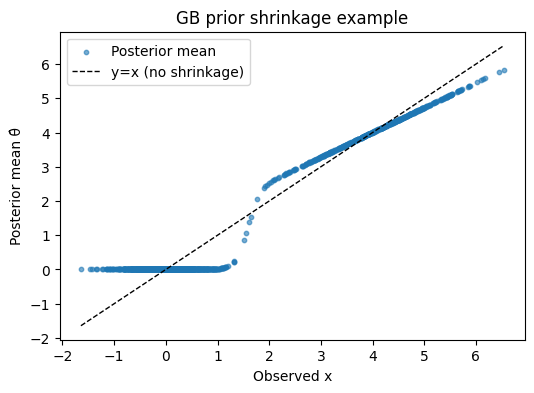

In [1]:
import torch
import matplotlib.pyplot as plt
from cebmf_torch.ebnm.generalized_binary import ebnm_gb
import numpy as np
# ---- simulate data from GB prior ----
torch.manual_seed(1)

n = 1500
true_pi = 0.3
true_mu = 4.0
true_omega = 0.2
true_sigma = true_omega * true_mu

# draw latent indicators
z = torch.bernoulli(torch.full((n,), true_pi))

# slab draws: truncated N(μ, σ^2) on [0, ∞)
slab = torch.distributions.Normal(true_mu, true_sigma).sample((n,))
slab = torch.clamp(slab, min=0.0)

theta = z * slab  # mixture with point mass at 0

# observed x = theta + noise
s = torch.full((n,), 0.5)  # known noise sd
x = theta + torch.randn(n) * s

# ---- fit EBNM GB ----
res = ebnm_gb(x, s, omega=true_omega)

print("Estimated π:", res.pi0)
print("Estimated μ:", res.mode)
print("Log-lik:", res.log_lik)

# ---- sanity check shrinkage ----
plt.figure(figsize=(6,4))
plt.scatter(x.numpy(), res.post_mean.numpy(), s=10, alpha=0.6, label="Posterior mean")
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', lw=1, label="y=x (no shrinkage)")
plt.xlabel("Observed x")
plt.ylabel("Posterior mean θ̂")
plt.title("GB prior shrinkage example")
plt.legend()
plt.show()


In [2]:
rr = torch.sqrt(torch.mean(res.post_mean-theta)**2)
rr

tensor(0.0014, dtype=torch.float64)

In [3]:
rmse_post=[]



for i in range(100):
    # Parameters
    n = 1500
    true_pi = 0.3
    true_mu = 4.0
    true_omega = 0.2
    true_sigma = true_omega * true_mu

# draw latent indicators
    z = torch.bernoulli(torch.full((n,), true_pi))

# slab draws: truncated N(μ, σ^2) on [0, ∞)
    slab = torch.distributions.Normal(true_mu, true_sigma).sample((n,))
    slab = torch.clamp(slab, min=0.0)

    theta = z * slab  # mixture with point mass at 0

# observed x = theta + noise
    s = torch.full((n,), 0.5)  # known noise sd
    x = theta + torch.randn(n) * s

# ---- fit EBNM GB ----
    res = ebnm_gb(x, s, omega=true_omega)
    rr = torch.sqrt(torch.mean(res.post_mean-theta)**2)
    rmse_post.append(rr)

In [7]:
np.mean (rmse_post)

np.float64(0.004819837076999836)

(array([14., 13.,  4.,  7., 12.,  6.,  8.,  8.,  6.,  6.,  5.,  2.,  2.,
         2.,  1.,  0.,  2.,  0.,  0.,  2.]),
 array([9.59710571e-05, 9.12936154e-04, 1.72990125e-03, 2.54686635e-03,
        3.36383145e-03, 4.18079654e-03, 4.99776164e-03, 5.81472674e-03,
        6.63169183e-03, 7.44865693e-03, 8.26562203e-03, 9.08258713e-03,
        9.89955222e-03, 1.07165173e-02, 1.15334824e-02, 1.23504475e-02,
        1.31674126e-02, 1.39843777e-02, 1.48013428e-02, 1.56183079e-02,
        1.64352730e-02]),
 <BarContainer object of 20 artists>)

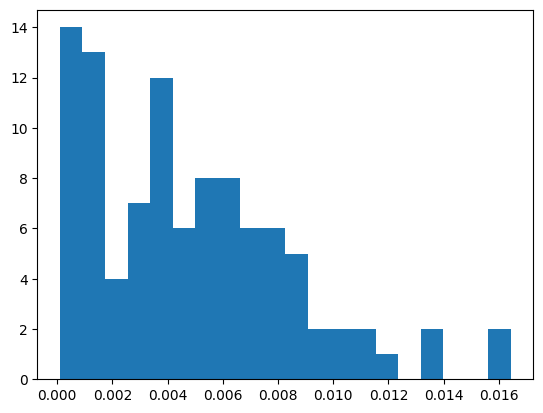

In [6]:
plt.hist( rmse_post, bins=20)